# Tests to see how SVM model works

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.svm import OneClassSVM

Automatically created module for IPython interactive environment


In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
xx, yy

(array([[-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
          4.97995992,  5.        ],
        [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
          4.97995992,  5.        ],
        [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
          4.97995992,  5.        ],
        ..., 
        [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
          4.97995992,  5.        ],
        [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
          4.97995992,  5.        ],
        [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
          4.97995992,  5.        ]]),
 array([[-5.        , -5.        , -5.        , ..., -5.        ,
         -5.        , -5.        ],
        [-4.97995992, -4.97995992, -4.97995992, ..., -4.97995992,
         -4.97995992, -4.97995992],
        [-4.95991984, -4.95991984, -4.95991984, ..., -4.95991984,
         -4.95991984, -4.95991984],
        ..., 
        [ 4.95991984,  4.95991984,  4.95991984, ...,

In [3]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train

array([[ 2.00143858,  1.85441269],
       [ 2.49580337,  2.07030641],
       [ 1.72728146,  2.05291543],
       [ 2.19708036,  1.84513286],
       [ 2.05315937,  2.24981285],
       [ 2.01045498,  2.32439043],
       [ 1.76676379,  2.21002988],
       [ 2.19787344,  1.53061523],
       [ 1.57911372,  2.06142942],
       [ 1.93265093,  1.84343441],
       [ 2.02208754,  1.8342356 ],
       [ 2.30006883,  2.15976779],
       [ 2.59530094,  2.3977818 ],
       [ 1.87252037,  1.80401317],
       [ 2.10923167,  2.34794131],
       [ 2.0097451 ,  1.79246163],
       [ 2.10788078,  1.73765226],
       [ 1.87724773,  1.96537885],
       [ 1.99232206,  1.84831168],
       [ 2.01881649,  1.92771565],
       [ 1.94674655,  1.78248772],
       [ 1.64979413,  1.79651975],
       [ 2.09593553,  1.74318249],
       [ 1.87503396,  1.85427457],
       [ 1.99001326,  2.02625423],
       [ 2.21040895,  2.28435562],
       [ 2.00433408,  2.15660193],
       [ 2.39466529,  1.61503427],
       [ 2.44566363,

In [4]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test

array([[ 2.08170238,  1.83572948],
       [ 2.01361797,  1.60037572],
       [ 1.98438684,  1.75388412],
       [ 2.25992509,  2.1375454 ],
       [ 2.11713011,  1.99411984],
       [ 1.8828007 ,  2.4399905 ],
       [ 1.94004492,  2.21487242],
       [ 2.1537405 ,  1.6884305 ],
       [ 2.00357672,  2.10767183],
       [ 2.45814084,  1.87355689],
       [ 2.01080943,  1.82960058],
       [ 1.81114106,  2.62182307],
       [ 2.13524606,  2.21380633],
       [ 2.07196137,  2.33693435],
       [ 2.13477879,  1.99212249],
       [ 2.13148381,  2.09293544],
       [ 1.5289435 ,  2.14785042],
       [ 1.79633141,  1.56102267],
       [ 1.65038411,  2.27838281],
       [ 1.82525716,  1.80830626],
       [-1.91829762, -2.16427052],
       [-1.98638203, -2.39962428],
       [-2.01561316, -2.24611588],
       [-1.74007491, -1.8624546 ],
       [-1.88286989, -2.00588016],
       [-2.1171993 , -1.5600095 ],
       [-2.05995508, -1.78512758],
       [-1.8462595 , -2.3115695 ],
       [-1.99642328,

In [5]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[  3.97395375e+00,   7.89768736e-01],
       [  3.04887492e+00,   6.35924043e-01],
       [  9.46335842e-01,   3.65812943e+00],
       [  2.66372634e+00,  -1.07875123e+00],
       [ -3.99004016e+00,  -8.37132776e-01],
       [  1.00269113e-01,  -3.39199985e+00],
       [  2.23210618e+00,  -1.85465002e+00],
       [  7.37721299e-01,   3.07149083e+00],
       [  4.64801512e-01,  -1.61675348e+00],
       [ -1.35875949e+00,  -2.56486493e+00],
       [ -1.87131427e+00,  -3.96269872e+00],
       [  2.18231692e+00,  -3.53003556e+00],
       [ -2.64257040e+00,   7.09151054e-01],
       [  3.91525806e+00,   2.42041745e+00],
       [  3.62724660e+00,  -3.99434511e+00],
       [ -5.95938303e-01,  -1.84272436e-01],
       [  1.14627202e+00,  -1.28728503e+00],
       [  2.95183952e-01,  -2.45166033e-03],
       [  2.16987542e+00,   1.92369235e+00],
       [  1.69898741e+00,   3.48617839e-01]])

In [6]:
X_train = np.concatenate((X_train, X_outliers))

In [7]:
# fit the model
clf = OneClassSVM(nu=0.2, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.2, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [8]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [9]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

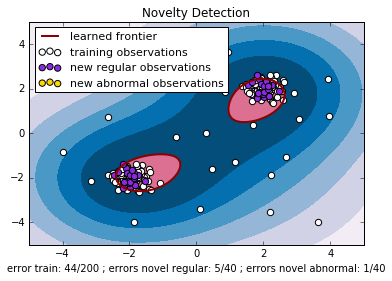

In [12]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

# Now make our model

In [13]:
# First format training data
x = [p.x for p in self.particle_cloud]
y = [p.y for p in self.particle_cloud]
X_train = np.array(zip(x, y))

# Next make unsupervised outlier detection model
# We have chosen to use OneClassSVM
clf = OneClassSVM(nu=0.3, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Predict inliers and outliers
y_pred_train = clf.predict(X_train)

# Create inlier and outlier particle lists
inliers = []
outliers = []

# Iterate through particles and predictions to populate lists
for p, pred in zip(self.particle_cloud, y_pred_train):
    if pred == 1:
        inliers.append(p)
    elif pred == -1:
        outliers.append(p)

return inliers, outliers

NameError: name 'self' is not defined